# German Bert Model

In [1]:
import datasets 
import numpy as np 
from transformers import BertTokenizerFast 
from transformers import DataCollatorForTokenClassification 
from transformers import AutoModelForTokenClassification 
from sklearn.model_selection import train_test_split
from datasets import Dataset


import warnings
warnings.filterwarnings('ignore')

# https://github.com/rohan-paul/MachineLearning-DeepLearning-Code-for-my-YouTube-Channel/blob/master/NLP/YT_Fine_tuning_BERT_NER_v1.ipynb

/Users/julianbehrendt/opt/anaconda3/envs/computational_semantics/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-01-31 18:09:02.520152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# This code block reads the data.txt file and outputs a list of lists with the tokens and
# a list of list of the semantic tags

full_sen = []
with open('train.de.txt') as fh:
    # Skip initial comments that starts with #
    while True:
        line = fh.readline()
        # break while statement if it is not a comment line
        # i.e. does not startwith #
        if not line.startswith('#'):
            full_sen.append(line) 
        if not line:
            break    

tokens = []
tags = []
train_tags = []
train_token =[]
train_data = []
train =[]
for i in range (0, len(full_sen)):
    string = full_sen[i].split("\t")
    if not len(full_sen[i]) == 0: 
        if string[0] == '\n':
            train_token.append(tokens) 
            tokens = []
            train_tags.append(tags)
            tags = []
            train_data.append(train)
            train = []
        else:
            tokens.append(string[0])
            tags.append(string[3])
            train.append((string[0],string[3]))
            
print("The training data set has",len(train_data), "sentences." )

The training data set has 1740 sentences.


In [3]:
full_sen = []
with open('test.de.txt') as fh:
    # Skip initial comments that starts with #
    while True:
        line = fh.readline()
        # break while statement if it is not a comment line
        # i.e. does not startwith #
        if not line.startswith('#'):
            full_sen.append(line) 
        if not line:
            break   
tokens = []
tags = []
test_token = []
test_tags =[]
test_data = []
test =[]
for i in range (0, len(full_sen)):
    string = full_sen[i].split("\t")
    if not len(full_sen[i]) == 0: 
        if string[0] == '\n':
            test_token.append(tokens) 
            tokens = []
            test_tags.append(tags)
            tags = []
            test_data.append(train)
            test = []
        else:
            tokens.append(string[0])
            tags.append(string[3])
            test.append((string[0],string[3]))

print("The testing data set has",len(test_data), "sentences.")

The testing data set has 546 sentences.


In [4]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased") 

In [5]:
def transform_into_ints(data,mydict):
    for sentences in range(0,len(data)):
        sent = data[sentences]
        for i in range(0,len(sent)):
            word = sent[i]
            transformation = mydict[word]
            sent[i] = transformation
    return data

In [6]:
mydict = np.load('universal_dict.npy',allow_pickle='TRUE').item()

In [7]:
train_tags_transformed = train_tags
test_tags_transformed = test_tags

transformed_input_train = transform_into_ints(train_tags_transformed,mydict)
transformed_input_test = transform_into_ints(test_tags_transformed, mydict)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
         train_token, transformed_input_train, test_size=0.3, random_state=18)

In [9]:
from collections import Counter

D = y_train

# Flatten the nested list
flattened_list = [item for sublist in D for item in sublist]

# Count the frequencies of each value
counter = Counter(flattened_list)

# Print the frequencies of each value
print(counter)

Counter({13: 1202, 1: 879, 9: 623, 21: 426, 23: 405, 18: 379, 2: 371, 5: 362, 6: 341, 0: 218, 12: 211, 4: 156, 29: 143, 7: 140, 19: 136, 11: 116, 20: 96, 26: 93, 24: 78, 31: 75, 34: 70, 16: 52, 14: 46, 39: 44, 25: 34, 49: 30, 15: 25, 38: 24, 37: 23, 17: 23, 44: 23, 45: 20, 53: 20, 43: 19, 41: 17, 22: 13, 10: 12, 42: 12, 52: 11, 35: 11, 50: 9, 51: 7, 62: 7, 32: 6, 28: 6, 3: 6, 33: 5, 40: 5, 47: 4, 54: 4, 36: 4, 58: 4, 60: 4, 55: 3, 48: 3, 46: 3, 63: 3, 27: 2, 57: 2, 30: 2, 67: 2, 8: 2, 61: 2})


In [10]:
def get_ids(tokens, tags):
    ids = []
    token = []
    ner_tags = []
    for i in range(0, len(tokens)):
        ids.append(i)
        token.append(tokens[i])
        ner_tags.append(tags[i])
    return ids, token, ner_tags

In [11]:
# To get it into the correct form: https://huggingface.co/docs/datasets/v1.1.1/loading_datasets.html

ids_train, tokens_train, ner_tags_train = get_ids(X_train, y_train)
ids_val, tokens_val, ner_tags_val = get_ids(X_val, y_val)

ids_test, tokens_test, ner_tags_test = get_ids(test_token, transformed_input_test)

train = {'input_ids': ids_train,
            'tokens': tokens_train,
            'ner_tags': ner_tags_train}

validation = {'input_ids': ids_val,
            'tokens': tokens_val,
            'ner_tags': ner_tags_val}

test = {'input_ids': ids_test,
            'tokens': tokens_test,
            'ner_tags': ner_tags_test}

train = Dataset.from_dict(train) 
validation = Dataset.from_dict(validation)
test = Dataset.from_dict(test)

data = {'train': train,
            'validation': validation,
            'test': test}

In [12]:
conll2003 = datasets.load_dataset("conll2003") 
conll2003

conll2003['train'] = data['train']
conll2003['validation'] = data['validation']
conll2003['test'] = data['test']

Found cached dataset conll2003 (/Users/julianbehrendt/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/9a4d16a94f8674ba3466315300359b0acd891b68b6c8743ddf60b9c702adce98)
100%|██████████| 3/3 [00:00<00:00, 215.15it/s]


In [13]:
conll2003

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 1218
    })
    validation: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 522
    })
    test: Dataset({
        features: ['input_ids', 'tokens', 'ner_tags'],
        num_rows: 546
    })
})

In [14]:
def tokenize_and_align_labels(examples, label_all_tokens=True): 

    
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True) 

    
    labels = [] 
    for i, label in enumerate(examples["ner_tags"]): 
        word_ids = tokenized_inputs.word_ids(batch_index=i) 
        # word_ids() => Return a list mapping the tokens
        # to their actual word in the initial sentence.
        # It Returns a list indicating the word corresponding to each token. 
        
        previous_word_idx = None 
        label_ids = []
        # Special tokens like `<s>` and `<\s>` are originally mapped to None 
        # We need to set the label to -100 so they are automatically ignored in the loss function.
        
        for word_idx in word_ids: 
            if word_idx is None: 
                # set –100 as the label for these special tokens
                label_ids.append(-100)
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            elif word_idx != previous_word_idx:
                # if current word_idx is != prev then its the most regular case
                # and add the corresponding token                 
                label_ids.append(label[word_idx]) 
            else: 
                # to take care of sub-words which have the same word_idx
                # set -100 as well for them, but only if label_all_tokens == False
                label_ids.append(label[word_idx] if label_all_tokens else -100) 
                # mask the subword representations after the first subword
                 
            previous_word_idx = word_idx 
        labels.append(label_ids) 
    tokenized_inputs["labels"] = labels 
    return tokenized_inputs 

In [15]:
tokenized_datasets = conll2003.map(tokenize_and_align_labels, batched=True)

100%|██████████| 1/1 [00:00<00:00, 18.41ba/s]


In [16]:
model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels= 69)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

In [17]:
from transformers import TrainingArguments, Trainer 
args = TrainingArguments( 
    "test-ner",
    evaluation_strategy = "epoch", 
    learning_rate=2e-5, 
    per_device_train_batch_size=32, 
    per_device_eval_batch_size=32, 
    num_train_epochs=10, 
    weight_decay=0.01, 
    eval_steps = 100,  
    save_total_limit = 2
) 

In [18]:
data_collator = DataCollatorForTokenClassification(tokenizer) 

In [19]:
metric = datasets.load_metric("seqeval") 

In [20]:
def compute_metrics(eval_preds): 
    pred_logits, labels = eval_preds 
    
    pred_logits = np.argmax(pred_logits, axis=2) 

    # the logits and the probabilities are in the same order,
    # so we don’t need to apply the softmax
    
    predictions = []
    true_labels = []
    for i in range(len(pred_logits)):
        pred_seq = []
        true_seq = []
        for j in range(len(pred_logits[i])):
            if labels[i][j] != -100:
                pred_seq.append(pred_logits[i][j])
                true_seq.append(labels[i][j])
        predictions.append(pred_seq)
        true_labels.append(true_seq)
    
    results = metric.compute(predictions=predictions, references=true_labels) 
    return { 
   "precision": results["overall_precision"], 
   "recall": results["overall_recall"], 
   "f1": results["overall_f1"], 
  "accuracy": results["overall_accuracy"], 
  } 

In [21]:
trainer = Trainer( 
    model, 
    args, 
   train_dataset=tokenized_datasets["train"], 
   eval_dataset=tokenized_datasets["validation"], 
   data_collator=data_collator, 
   tokenizer=tokenizer, 
   compute_metrics=compute_metrics
) 

In [22]:
trainer.train() 

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: ner_tags, tokens. If ner_tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 1218
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 390
  Number of trainable parameters = 108944709
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,2.214611,0.490177,0.411207,0.447233,0.463120
2,No log,1.564123,0.527699,0.537701,0.532653,0.598197
3,No log,1.235620,0.592157,0.622167,0.606791,0.691073
4,No log,1.052298,0.674771,0.697569,0.685981,0.747520
5,No log,0.926323,0.712187,0.739184,0.725435,0.779261
6,No log,0.852641,0.740369,0.760198,0.750152,0.796934
7,No log,0.811695,0.754962,0.768026,0.761438,0.809017
8,No log,0.774507,0.769915,0.784508,0.777143,0.818936
9,No log,0.757455,0.768548,0.785332,0.776849,0.823445
10,No log,0.753998,0.768023,0.785744,0.776782,0.823625


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: ner_tags, tokens. If ner_tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 522
  Batch size = 32
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: ner_tags, tokens. If ner_tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 522
  Batch size = 32
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: ner_tags, tokens. If ner_tags, tokens are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
 

TrainOutput(global_step=390, training_loss=1.2701290815304487, metrics={'train_runtime': 1118.5197, 'train_samples_per_second': 10.889, 'train_steps_per_second': 0.349, 'total_flos': 132466806466596.0, 'train_loss': 1.2701290815304487, 'epoch': 10.0})

In [23]:
model.save_pretrained("bert_deutsch")

Configuration saved in bert_deutsch/config.json
Model weights saved in bert_deutsch/pytorch_model.bin


In [24]:
model_fine_tuned_german = AutoModelForTokenClassification.from_pretrained("bert_deutsch")

loading configuration file bert_deutsch/config.json
Model config BertConfig {
  "_name_or_path": "bert_deutsch",
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LAB

In [25]:
from transformers import pipeline
import re
len_test = 546

In [27]:
nlp = pipeline("ner", model= model_fine_tuned_german, tokenizer=tokenizer)

all_true_labels = []
all_prediction_labels = []
for i in range(0,len_test):
    test_data = conll2003['test'][i] 
    
    true_labels = test_data['ner_tags']
    all_true_labels.append(true_labels)
    
    tokens = test_data['tokens']
    ner_predictions = nlp(tokens)
    
    prediction_labels = []
    for i in range(0, len(ner_predictions)):
        x = ner_predictions[i]
        s = x[0]
        string = s['entity']
        label = int(re.search(r'\d+', string).group())
        prediction_labels.append(label)
    
    
    all_prediction_labels.append(prediction_labels)

In [28]:
all_prediction_labels

[[5, 6, 13, 23, 5, 13],
 [5, 5, 18, 18, 13],
 [6, 9, 0, 1, 34],
 [9, 2, 23, 1, 13, 6, 24, 1, 13],
 [9, 18, 9, 13, 18, 13],
 [5, 13],
 [13, 2, 18, 18, 13],
 [9, 6, 13, 5, 13],
 [18, 13],
 [60],
 [9, 18, 26, 13, 34, 5, 5, 5, 2, 13],
 [9, 6, 1, 21, 23, 1, 13],
 [5, 1, 4, 1, 13, 18, 23, 18, 5, 13],
 [5, 2, 5, 13],
 [9, 18, 23, 18, 6, 13, 13],
 [9, 18, 18, 13],
 [9, 2, 26, 18, 5, 13],
 [23, 1, 11, 23, 1, 13],
 [9, 2, 0, 11, 13],
 [9, 2, 18, 13],
 [5, 6, 0, 1, 21, 1, 21, 13],
 [23, 7, 18, 23, 6, 13],
 [9, 18, 18, 13],
 [5, 6, 5, 6, 34],
 [5, 6, 4, 1, 5, 13],
 [0, 6, 0, 13],
 [23, 19, 2, 18, 13],
 [5, 5, 0, 18, 13],
 [5, 2, 19, 13],
 [18, 1, 2, 18, 13],
 [9, 18, 13],
 [4, 7, 13, 1, 1, 13],
 [9, 2, 13, 23, 29, 0, 13, 1, 13],
 [4, 5, 6, 13, 0, 6, 18, 13],
 [5, 1, 23, 6, 13],
 [9, 6, 0, 19, 13],
 [9, 18, 9, 23, 18, 13],
 [5, 18, 23, 1, 13, 1, 23, 1, 18, 13],
 [23, 1, 6, 18, 5, 18, 13],
 [4, 18, 6, 18, 13],
 [9, 2, 18, 18, 13],
 [9, 2, 26, 7, 18, 13],
 [18, 6, 5, 13],
 [5, 13, 5, 2, 0, 18, 5, 13]

In [29]:
all_true_labels

[[5, 6, 21, 23, 50, 13],
 [5, 20, 15, 12, 13],
 [6, 9, 0, 1, 34],
 [9, 2, 23, 1, 21, 19, 24, 29, 13],
 [9, 18, 46, 21, 1, 13],
 [56, 13],
 [9, 2, 15, 12, 13],
 [9, 6, 21, 31, 13],
 [56, 38],
 [60],
 [9, 6, 26, 13, 34, 5, 4, 1, 6, 13],
 [9, 6, 1, 21, 23, 1, 13],
 [5, 18, 4, 1, 33, 18, 23, 1, 5, 13],
 [5, 2, 12, 13],
 [9, 18, 23, 12, 7, 21, 13],
 [9, 36, 11, 13],
 [9, 6, 26, 12, 7, 13],
 [23, 1, 6, 23, 1, 13],
 [9, 2, 0, 7, 13],
 [9, 2, 12, 13],
 [5, 18, 0, 1, 23, 1, 21, 13],
 [23, 7, 18, 23, 1, 13],
 [9, 6, 1, 13],
 [34, 2, 9, 29, 34],
 [5, 6, 4, 7, 5, 13],
 [39, 6, 39, 13],
 [23, 1, 2, 29, 13],
 [5, 18, 0, 7, 13],
 [9, 2, 29, 13],
 [39, 7, 2, 12, 13],
 [9, 18, 13],
 [4, 7, 6, 12, 1, 13],
 [9, 2, 21, 23, 1, 0, 1, 29, 13],
 [4, 7, 6, 21, 0, 12, 1, 13],
 [5, 18, 23, 1, 13],
 [9, 18, 0, 1, 13],
 [9, 18, 9, 23, 1, 13],
 [5, 18, 23, 1, 33, 18, 23, 1, 21, 13],
 [23, 1, 6, 52, 19, 1, 13],
 [4, 1, 20, 41, 13],
 [9, 2, 1, 29, 13],
 [9, 6, 26, 12, 7, 13],
 [39, 20, 12, 13],
 [5, 28, 5, 6, 0, 12, 

In [30]:
results = metric.compute(predictions=all_prediction_labels, references=all_true_labels) 


In [31]:
results

{'0': {'precision': 0.8809523809523809,
  'recall': 0.5285714285714286,
  'f1': 0.6607142857142858,
  'number': 70},
 '1': {'precision': 0.569620253164557,
  'recall': 0.34220532319391633,
  'f1': 0.4275534441805226,
  'number': 263},
 '2': {'precision': 1.0,
  'recall': 0.01694915254237288,
  'f1': 0.03333333333333333,
  'number': 118},
 '3': {'precision': 0.7965895249695494,
  'recall': 0.9095966620305981,
  'f1': 0.8493506493506493,
  'number': 719},
 '4': {'precision': 0.8227848101265823,
  'recall': 0.6372549019607843,
  'f1': 0.7182320441988951,
  'number': 102},
 '5': {'precision': 1.0,
  'recall': 0.10256410256410256,
  'f1': 0.18604651162790695,
  'number': 39},
 '6': {'precision': 0.9487179487179487,
  'recall': 0.6065573770491803,
  'f1': 0.74,
  'number': 61},
 '7': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 30},
 '8': {'precision': 0.3786127167630058,
  'recall': 0.7401129943502824,
  'f1': 0.5009560229445507,
  'number': 177},
 '9': {'precision': 0.47058823529

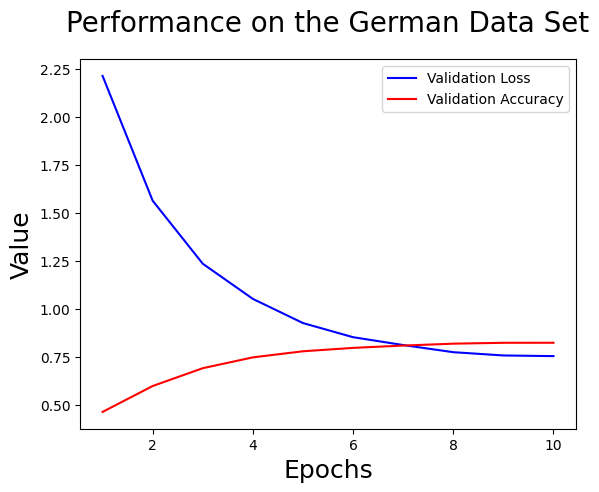

In [43]:
import matplotlib.pyplot as plt

loss = [0.6, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.18, 0.15, 0.12]
acc = [0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.93, 0.94, 0.95]

epochs = range(1, 11)

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
#ax.set_title('Title', pad=20)


plt.title('Performance on the German Data Set', fontsize=20,pad=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Value', fontsize=18)

plt.legend()
plt.show()